> NAME: RAJI GBENGA KABIR  <br/>
  EMAIL: rajigbenga5@gmail.com

# Project: Investigate a Dataset (No-show Appointment)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics such as:
<ul>
<li><p>PatientId</p></li>     
<li><p>AppointmentID</p></li>
<li><p>Gender</p></li>     
<li><p>ScheduledDay</p></li>  
<li><p>AppointmentDay</p></li>
<li><p>Age</p></li>          
<li><p>Neighbourhood</p></li>
<li><p>Scholarship</p></li>  
<li><p>Hipertension</p></li>  
<li><p>Diabetes</p></li>    
<li><p>Alcoholism</p></li>    
<li><p>Handcap</p></li>    
<li><p>SMS_received</p></li>  
<li><p>No-show</p></li>
</ul>
about the patient are included in each row.

### Question(s) for Analysis
<ol>
<li>What age group mostly show up for appointment?</li>
<li>How those a patient ailment affects their presence for their appointment?</li>
<li>How does a patients residence affects his/her presence for appointment?</li>
<li>Does sending of sms improve the percentage of present patients?</li>
</ol>

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
#Loading the no show appointment dataset and printing few lines
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# view shape of dataset
df.shape

(110527, 14)

In [4]:
#view information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#checking the amount of unique values per columns
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [6]:
#checking for duplicates
df.duplicated().sum()

0

In [7]:
#statistical summary of the dataset
df.describe(include='all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


### Data Cleaning 

> **Note**: We can see from the information above, that some columns have incorrect datatypes and that their are no null value in this dataset. It is also inferred that the handcap and sms_recieved columns are interchanged because the handcap column is seen to have 5 unique values instead of 2 and sms_recieved is supposedly to have more than 2 unique values, so it is suggested that the handcap and sms_recieved columns are missed labeled in the dataset.

In [8]:
#coverted the columns name to lower cases and changing "-" to "_"
df.columns = df.columns.str.lower().str.replace("-", "_")

#organizing the datatypes
df['patientid'] = df['patientid'].astype('object')
df['appointmentid'] = df['appointmentid'].astype('object')
df.scheduledday = pd.to_datetime(df.scheduledday)
df.appointmentday = pd.to_datetime(df.appointmentday)

In [9]:
#renaming handcap and and sms_received columns
df.rename(columns={'handcap':'sms_received', 'sms_received':'handcap'}, inplace=True)
df.nunique()

patientid          62299
appointmentid     110527
gender                 2
scheduledday      103549
appointmentday        27
age                  104
neighbourhood         81
scholarship            2
hipertension           2
diabetes               2
alcoholism             2
sms_received           5
handcap                2
no_show                2
dtype: int64

#### interchanged the handcap and sms_received columns values

In [10]:
#Creating age_group column to group age in classes
df['age_group'] = pd.cut(df.age, bins=[-1,16,30,45,60,75,90,115], 
                         labels=['<16', '16-30', '30-45', '45-60', '60-75', '75-90', '>90'])

In [11]:
#creating a column for total ailment per patient
df['tot_ill_per_patient'] = df[['hipertension', 'diabetes', 'alcoholism', 'handcap']].sum(axis=1)

In [12]:
#creating show and no_show subset dataset
absent = df[df.no_show == 'Yes']
present = df[df.no_show == 'No']

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (What age group mostly show up for appointment?)

In [13]:
Total_count  = df.groupby(['age_group']).count()
present_count = present.groupby(['age_group']).count()
df_2 = present_count/Total_count
df_2

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,sms_received,handcap,no_show,tot_ill_per_patient
age_group,,,,,,,,,,,,,,,
<16,0.783494,0.783494,0.783494,0.783494,0.783494,0.783494,0.783494,0.783494,0.783494,0.783494,0.783494,0.783494,0.783494,0.783494,0.783494
16-30,0.752593,0.752593,0.752593,0.752593,0.752593,0.752593,0.752593,0.752593,0.752593,0.752593,0.752593,0.752593,0.752593,0.752593,0.752593
30-45,0.786280,0.786280,0.786280,0.786280,0.786280,0.786280,0.786280,0.786280,0.786280,0.786280,0.786280,0.786280,0.786280,0.786280,0.786280
45-60,0.821778,0.821778,0.821778,0.821778,0.821778,0.821778,0.821778,0.821778,0.821778,0.821778,0.821778,0.821778,0.821778,0.821778,0.821778
60-75,0.851357,0.851357,0.851357,0.851357,0.851357,0.851357,0.851357,0.851357,0.851357,0.851357,0.851357,0.851357,0.851357,0.851357,0.851357
75-90,0.841070,0.841070,0.841070,0.841070,0.841070,0.841070,0.841070,0.841070,0.841070,0.841070,0.841070,0.841070,0.841070,0.841070,0.841070
>90,0.798701,0.798701,0.798701,0.798701,0.798701,0.798701,0.798701,0.798701,0.798701,0.798701,0.798701,0.798701,0.798701,0.798701,0.798701


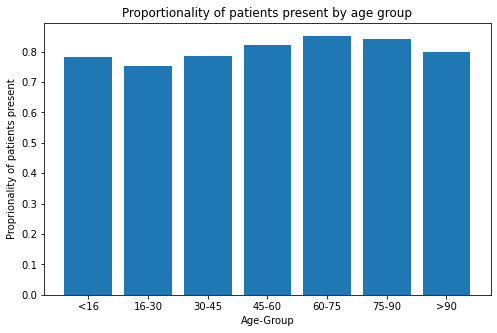

In [14]:
label = df_2.index
values = df_2.patientid.values
plt.figure(figsize=(8,5))
plt.bar(label, values)
plt.title('Proportionality of patients present by age group')
plt.ylabel('Proprionality of patients present')
plt.xlabel('Age-Group')
plt.show()

#### A high proportion of patient within the age of 60-75 always show up for their appointment

### Research Question 2  (How those a patient ailment affects their presence for their appointment?)

In [15]:
ailment_based = df.groupby('no_show').sum()[['hipertension', 'diabetes', 'alcoholism', 'handcap']]
total_ailment = df[['hipertension', 'diabetes', 'alcoholism', 'handcap']].sum()
df_3 = ailment_based / total_ailment
df_3

,hipertension,diabetes,alcoholism,handcap
no_show,,,,
No,0.82698,0.819967,0.798512,0.724255
Yes,0.17302,0.180033,0.201488,0.275745


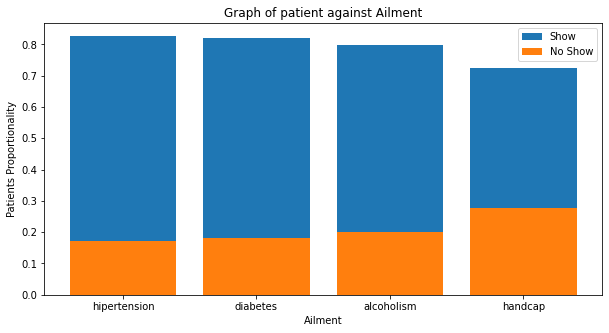

In [25]:
no_show = df_3.values[1]
show = df_3.values[0]
label = ['hipertension', 'diabetes', 'alcoholism', 'handcap']

plt.figure(figsize=(10,5))
plt.bar(label, show, label='Show')
plt.bar(label, no_show, label='No Show')
plt.title('Graph of patient against Ailment')
plt.ylabel('Patients Proportionality')
plt.xlabel('Ailment')
plt.legend()
plt.show()

#### The above chart shows how the type of ailment affects a patients presence for appointment. Patients with hipertension are the most present on their appointment day and handicapped patient are the least present

In [17]:
present_tot_ail = present.groupby('tot_ill_per_patient').count()
total_ail = df.groupby('tot_ill_per_patient').count()
df_4 = present_tot_ail/total_ail
df_4

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,sms_received,handcap,no_show,age_group
tot_ill_per_patient,,,,,,,,,,,,,,,
0,0.828331,0.828331,0.828331,0.828331,0.828331,0.828331,0.828331,0.828331,0.828331,0.828331,0.828331,0.828331,0.828331,0.828331,0.828328
1,0.754431,0.754431,0.754431,0.754431,0.754431,0.754431,0.754431,0.754431,0.754431,0.754431,0.754431,0.754431,0.754431,0.754431,0.754431
2,0.802369,0.802369,0.802369,0.802369,0.802369,0.802369,0.802369,0.802369,0.802369,0.802369,0.802369,0.802369,0.802369,0.802369,0.802369
3,0.774417,0.774417,0.774417,0.774417,0.774417,0.774417,0.774417,0.774417,0.774417,0.774417,0.774417,0.774417,0.774417,0.774417,0.774417
4,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231


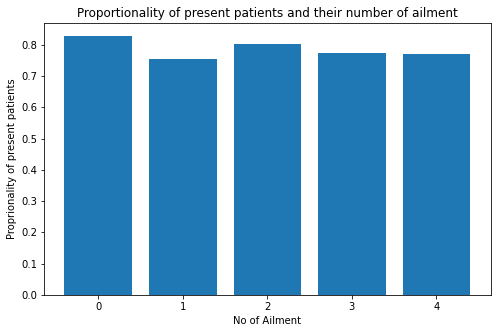

In [18]:
label = df_4.index
values = df_4.patientid.values

plt.figure(figsize=(8,5))
plt.bar(label, values)
plt.title('Proportionality of present patients and their number of ailment')
plt.ylabel('Proprionality of present patients')
plt.xlabel('No of Ailment')
plt.show()

#### The above chart shows how the number of ailment a patient has affects his/her presence for appointment. Patients with zero ailment are the most present and one ailment are most absent

### Research Question 3 (How does a patients residence affects his/her presence for appointment?)

In [19]:
df_5 = (present.neighbourhood.value_counts()/df.neighbourhood.value_counts()).sort_values(ascending=False)
df_5

PARQUE INDUSTRIAL              1.000000
ILHA DO BOI                    0.914286
AEROPORTO                      0.875000
MÁRIO CYPRESTE                 0.854447
SOLON BORGES                   0.852878
                                 ...   
ITARARÉ                        0.737336
SANTA CLARA                    0.735178
SANTA CECÍLIA                  0.725446
SANTOS DUMONT                  0.710815
ILHAS OCEÂNICAS DE TRINDADE         NaN
Name: neighbourhood, Length: 81, dtype: float64

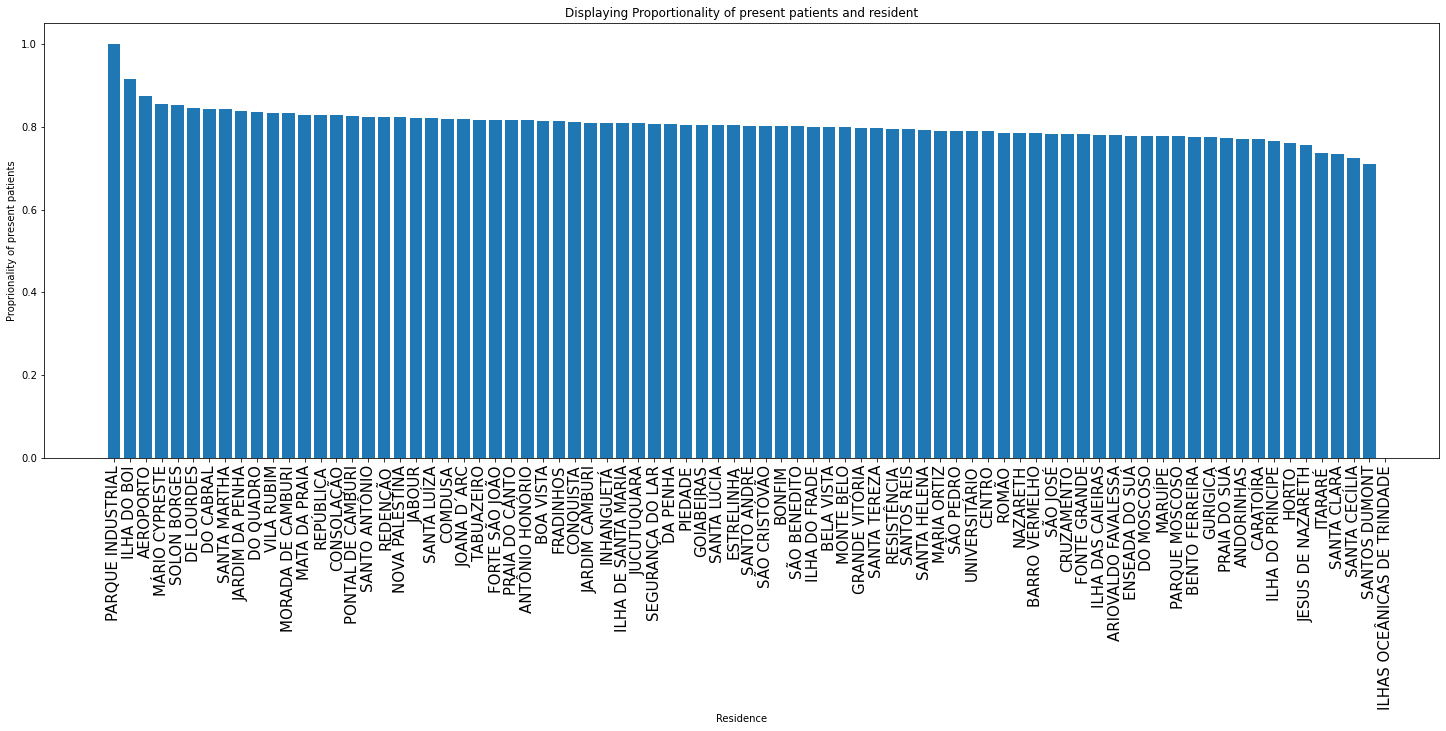

In [20]:
label = df_5.index
values = df_5.values

plt.figure(figsize=(25,8))
plt.bar(label, values)
plt.title('Displaying Proportionality of present patients and resident')
plt.ylabel('Proprionality of present patients')
plt.xlabel('Residence')
plt.xticks(rotation=90, size=15)
plt.show()

#### All patients from ILHAS OCEÂNICAS DE TRINDADE did not show up for their appointment. Also, patients from PARQUE INDUSTRIAL, ILHA DO BOI are likely to show their appointment.

### Research Question 4  (Does sending of sms improve the percentage of present patients?)

In [21]:
df_6 = (present.groupby('sms_received').count()/df.groupby('sms_received').count())
df_6

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,no_show,age_group,tot_ill_per_patient
sms_received,,,,,,,,,,,,,,,
0,0.797647,0.797647,0.797647,0.797647,0.797647,0.797647,0.797647,0.797647,0.797647,0.797647,0.797647,0.797647,0.797647,0.797645,0.797647
1,0.820764,0.820764,0.820764,0.820764,0.820764,0.820764,0.820764,0.820764,0.820764,0.820764,0.820764,0.820764,0.820764,0.820764,0.820764
2,0.797814,0.797814,0.797814,0.797814,0.797814,0.797814,0.797814,0.797814,0.797814,0.797814,0.797814,0.797814,0.797814,0.797814,0.797814
3,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231
4,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667


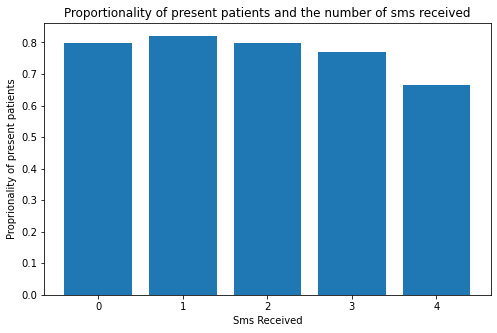

In [22]:
label = df_6.index
values = df_6.patientid.values

plt.figure(figsize=(8,5))
plt.bar(label, values)
plt.title('Proportionality of present patients and the number of sms received')
plt.ylabel('Proprionality of present patients')
plt.xlabel('Sms Received')
plt.show()

#### Sending multiple messages to remind a patient of appointment does not help rather sending just one message is enough

<a id='conclusions'></a>
## Conclusions

<p>We can deduced that sending of messages, does not rely convince a patient to show up for appointment. Thereby the hospital can reduce cost from sending multiple messages to patient. The hospital should also pay more attention to handcap patients, in other to increase their presence for appointment. They can also find out why all patients from PARQUE INDUSTRIAL are absent so as to prevent future absence.<\p>